In [1]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

from data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from visualizations import evaluate_model, confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('rf', RandomForestClassifier(random_state=0))])

In [3]:
parameters = {'rf__max_depth': [None],
              'rf__n_estimators': [100]}

In [4]:
rf_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs= -1)
rf_classifier.fit(tf_idf_data_train, y_train)
print(rf_classifier.best_estimator_)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=0, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('rf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                   

In [5]:
evaluate_model(tf_idf_data_train, y_train, tf_idf_data_test, y_test, rf_classifier)

Training Score:0.9977643791071066
Cross V Score: 0.6095787700409011 +/- 0.005968806264857233
Testing Score: 0.620199146514936
Cross & Test Diff: 0.01062037647403491
Standard Deviations Away: 1.7793133170639
[[ 523  586  202]
 [ 154 1724  269]
 [ 138  520  805]]


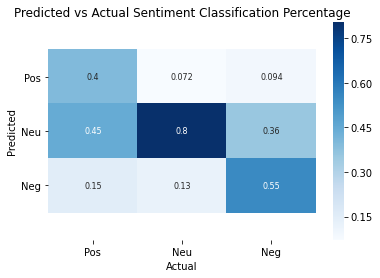

In [6]:
confusion_matrix_heat_map(rf_classifier, tf_idf_data_test, y_test)